# **SOMMAIRE :**
 - <a href="#A1">**Chargement des librairies importées**</a>

 - <a href="#A2">**Chargement des données**</a>

 - <a href="#A3">**Display**</a>

 - <a href="#A4">**Methodes de regression linéaire**</a>

 - <a href="#A5">**Methodes de regression non-linéaire**</a>

 - <a href="#A6">**CHOIX DE LA MEILLEURE METHODE DE PREDICTION**</a>

> #  **TRAITE :** PREDICTION AVEC LA VARIABLE TARGET **SiteEnergyUse(kBtu)**

# <a name="A1">**Chargement des ibrairies à importées**</a>

In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# <a name="A2">**Chargement des données**</a>

In [32]:
df_for_prediction = pd.read_csv('df_for_prediction.csv')

**Display**

In [33]:
df_for_prediction.head()

,Campus,NonResidential,Nonresidential COS,SPS-District K-12,PrimaryPropertyType,ENERGYSTARScore,YearBuiltEncoded,NumberofFloors,PropertyGFATotal,PropertyGFAParking,SiteEnergyUse(kBtu),TotalGHGEmissions
0,0,1,0,0,Hotel,60.0,27.0,2.564949,11.390023,0.000000,15.793246,5.525373
1,0,1,0,0,Hotel,61.0,93.0,2.484907,11.547974,9.620129,15.942305,5.693261
2,0,1,0,0,Hotel,43.0,66.0,3.737670,13.770629,12.189532,18.100297,7.645053
3,0,1,0,0,Hotel,56.0,26.0,2.397895,11.023878,0.000000,15.731637,5.660979
4,0,1,0,0,Hotel,75.0,77.0,2.944439,12.075856,11.034906,16.466822,6.226556


# <a name="A3"> **Methodes de regression linéaire** </a>

> ## **Modèle de régression lineaire classique**

In [4]:
df_for_prediction.columns

Index(['Campus', 'NonResidential', 'Nonresidential COS', 'SPS-District K-12',
       'PrimaryPropertyType', 'ENERGYSTARScore', 'YearBuiltEncoded',
       'NumberofFloors', 'PropertyGFATotal', 'PropertyGFAParking',
       'SiteEnergyUse(kBtu)', 'TotalGHGEmissions'],
      dtype='object')

Spécifions X et y

In [5]:
X = df_for_prediction.loc[:, ~df_for_prediction.columns.isin(['SiteEnergyUse(kBtu)', 'ENERGYSTARScore','TotalGHGEmissions'])]
X.head()

,Campus,NonResidential,Nonresidential COS,SPS-District K-12,PrimaryPropertyType,YearBuiltEncoded,NumberofFloors,PropertyGFATotal,PropertyGFAParking
0,0,1,0,0,Hotel,27.0,2.564949,11.390023,0.000000
1,0,1,0,0,Hotel,93.0,2.484907,11.547974,9.620129
2,0,1,0,0,Hotel,66.0,3.737670,13.770629,12.189532
3,0,1,0,0,Hotel,26.0,2.397895,11.023878,0.000000
4,0,1,0,0,Hotel,77.0,2.944439,12.075856,11.034906


In [6]:
y = df_for_prediction['SiteEnergyUse(kBtu)']
y.head()

0    15.793246
1    15.942305
2    18.100297
3    15.731637
4    16.466822
Name: SiteEnergyUse(kBtu), dtype: float64

Partitionnons nos données en données Train et Test

In [7]:
from sklearn import model_selection

In [8]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, 
                                                                    y, 
                                                                    test_size=0.3
                                                                    )

>>Effectuons un TARGET encoder sur la variable **PrimaryPropertyType**

In [9]:
!pip install category_encoders

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.2/81.2 kB 1.9 MB/s eta 0:00:00


In [10]:
import category_encoders as ce

In [11]:
# Créer un encodeur target pour la variable 'PrimaryPropertyType'
encoder = ce.TargetEncoder(cols=['PrimaryPropertyType'])
encoder

TargetEncoder(cols=['PrimaryPropertyType'])

In [12]:
# Appliquer l'encodeur sur les données
X_train['PrimaryEncoded'] = encoder.fit_transform(X_train['PrimaryPropertyType'], y_train)  
X_train.head()

,Campus,NonResidential,Nonresidential COS,SPS-District K-12,PrimaryPropertyType,YearBuiltEncoded,NumberofFloors,PropertyGFATotal,PropertyGFAParking,PrimaryEncoded
64,0,0,1,0,Other,36.0,1.791759,12.889387,0.00000,15.116880
1280,0,1,0,0,Mixed Use Property,106.0,2.995732,14.003376,12.21532,14.958142
1031,0,1,0,0,Small- and Mid-Sized Office,16.0,1.386294,10.366435,0.00000,14.489944
789,0,1,0,0,Retail Store,20.0,1.098612,10.181157,0.00000,14.917276
217,0,1,0,0,Large Office,16.0,1.945910,12.766577,0.00000,16.349296


In [13]:
X_test['PrimaryEncoded'] = encoder.transform(X_test['PrimaryPropertyType'], y_test)
X_test.head()

,Campus,NonResidential,Nonresidential COS,SPS-District K-12,PrimaryPropertyType,YearBuiltEncoded,NumberofFloors,PropertyGFATotal,PropertyGFAParking,PrimaryEncoded
803,0,1,0,0,Medical Office,59.0,1.098612,10.337086,9.238539,15.312006
622,0,1,0,0,Mixed Use Property,51.0,1.098612,10.264548,8.712924,14.958142
794,0,1,0,0,Retail Store,0.0,1.609438,10.453947,0.000000,14.917276
1393,0,1,0,0,Worship Facility,99.0,0.693147,10.124870,0.000000,13.808441
666,0,1,0,0,Small- and Mid-Sized Office,109.0,1.098612,11.339964,10.184825,14.489944


In [14]:
X_train_reg = X_train.drop(columns='PrimaryPropertyType')
X_test_reg = X_test.drop(columns='PrimaryPropertyType')

In [15]:
X_train_reg.head()

,Campus,NonResidential,Nonresidential COS,SPS-District K-12,YearBuiltEncoded,NumberofFloors,PropertyGFATotal,PropertyGFAParking,PrimaryEncoded
64,0,0,1,0,36.0,1.791759,12.889387,0.00000,15.116880
1280,0,1,0,0,106.0,2.995732,14.003376,12.21532,14.958142
1031,0,1,0,0,16.0,1.386294,10.366435,0.00000,14.489944
789,0,1,0,0,20.0,1.098612,10.181157,0.00000,14.917276
217,0,1,0,0,16.0,1.945910,12.766577,0.00000,16.349296


In [16]:
X_test_reg.head()

,Campus,NonResidential,Nonresidential COS,SPS-District K-12,YearBuiltEncoded,NumberofFloors,PropertyGFATotal,PropertyGFAParking,PrimaryEncoded
803,0,1,0,0,59.0,1.098612,10.337086,9.238539,15.312006
622,0,1,0,0,51.0,1.098612,10.264548,8.712924,14.958142
794,0,1,0,0,0.0,1.609438,10.453947,0.000000,14.917276
1393,0,1,0,0,99.0,0.693147,10.124870,0.000000,13.808441
666,0,1,0,0,109.0,1.098612,11.339964,10.184825,14.489944


La première étape est d'effectuer une régression linéaire classique afin de récupérer une erreur baseline, qu'on souhaite améliorer à l'aide des techniques de régularisation.

In [17]:
# Importons les librairies
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

On crée un modèle de régression linéaire

In [18]:
linreg = LinearRegression()

In [19]:
import time

In [20]:
# Mesurer le temps d'exécution de la fonction fit()
start_time = time.time()

On entraîne ce modèle sur les données d'entrainement

In [21]:
linreg.fit(X_train_reg, y_train)

LinearRegression()

> Mesurons le temps d'exécution à l'entrainement

In [22]:
fit_time = (time.time() - start_time) * 1000  # Transformer le temps en millisecondes
print("Temps d'exécution de la fonction fit(): {:.2f} ms".format(fit_time))

Temps d'exécution de la fonction fit(): 60.66 ms


In [23]:
# Mesurer le temps d'exécution de la fonction predict()
start_time = time.time()

**Nous allons faire des prédictions sur l'ensemble de test**

In [24]:
y_pred = linreg.predict(X_test_reg)

> Mesurons le temps d'exécution à la prédiction

In [25]:
predict_time = (time.time() - start_time) * 1000  # Transformer le temps en millisecondes
print("Temps d'exécution de la fonction predict(): {:.2f} ms".format(predict_time))

Temps d'exécution de la fonction predict(): 23.90 ms


**La baseline :** 

calculons l'**erreur de norme 2** sur les données de test

In [26]:
error_norm2 = mean_squared_error(y_test, y_pred, squared=False)
print("On obtient cette erreur quadratique 'RMSE' :", error_norm2.round(4))

On obtient cette erreur quadratique 'RMSE' : 0.7113


calculons **les métriques R2_score, RMSE** et **MAE**

In [27]:
r2 = r2_score(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
mae = mean_absolute_error(y_test, y_pred)

# Afficher les métriques
print("R2_score          : ", r2.round(4))                           # Le coefficient de détermination R2 mesure la proportion de la variance dans les données de réponse qui est expliquée par le modèle
print("RMSE              : ", rmse.round(4))
print("MAE               : ", mae.round(4))                               # L'erreur absolue moyenne (MAE) mesure l'erreur moyenne absolue entre les valeurs prédites et les valeurs réelles en termes d'unité de réponse

R2_score          :  0.6708
RMSE              :  0.7113
MAE               :  0.5524


Ces métriques indiquent que **le modèle a une performance acceptable** mais peut encore être amélioré. 

**NB :** 

Il est recommandé de comparer ces résultats à ceux d'autres modèles pour évaluer la performance relative du modèle actuel et identifier des moyens d'amélioration.

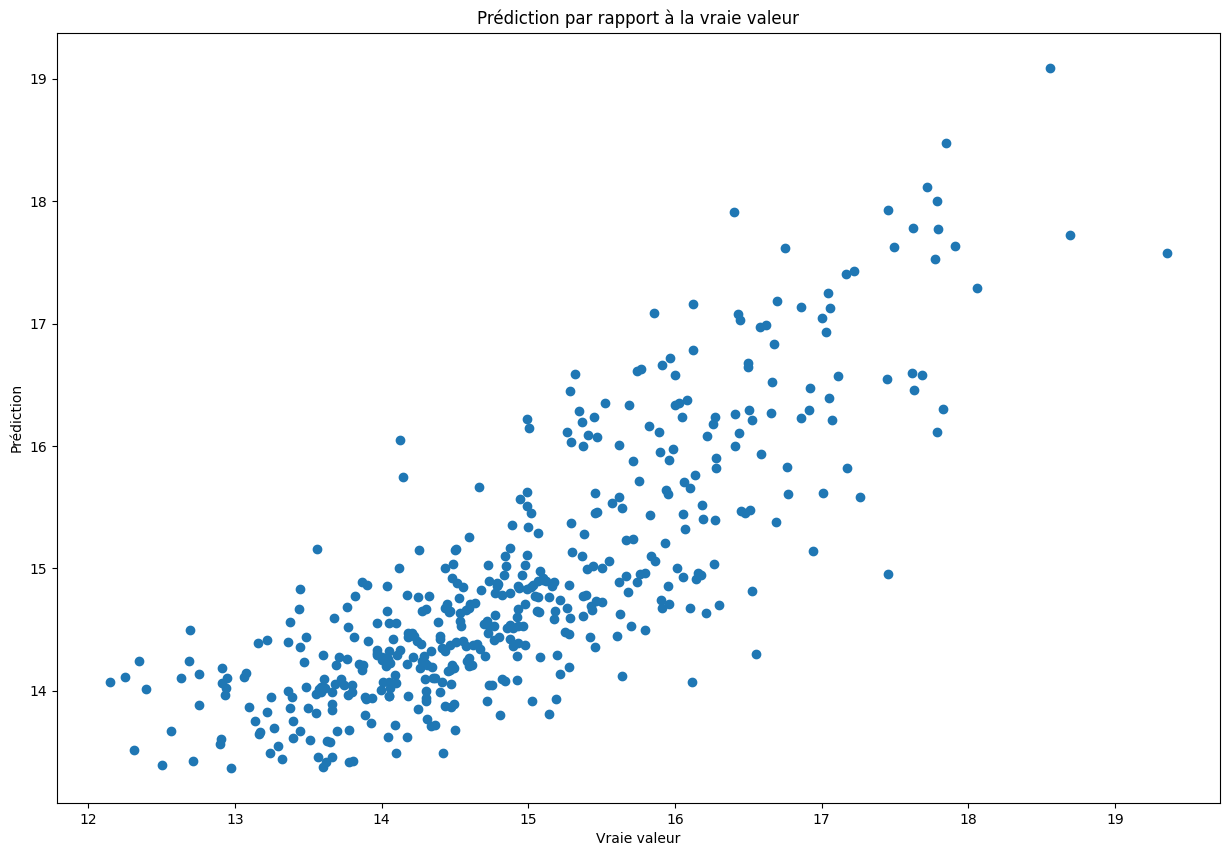

In [28]:
plt.figure(figsize=(15, 10))

# Tracer le graphique de la prédiction par rapport à la vraie valeur
plt.scatter(y_test, y_pred)
plt.xlabel("Vraie valeur")
plt.ylabel("Prédiction")
plt.title("Prédiction par rapport à la vraie valeur")
plt.show()

> Appliquons la transformation exponentielle sur la RMSE du kBTU sur les prédictions de votre modèle

In [29]:
# Calculons les prédictions en log
y_pred_exp = np.exp(y_pred)

In [30]:
# Calculons la RMSE en exp
rmse_exp= mean_squared_error(np.exp(y_test), y_pred_exp, squared=False)

# Appliquons la transformation exponentielle
rmse_kbtu = rmse_exp

print("RMSE en kBTU      : ", rmse_kbtu.round(4))

RMSE en kBTU      :  13353983.1152


> ## **Modèle RIDGE et LASSO**

>> ### **Application du RIDGE**

> **Spécifions X et y**

In [34]:
X = df_for_prediction.loc[:, ~df_for_prediction.columns.isin(['SiteEnergyUse(kBtu)', 'ENERGYSTARScore','TotalGHGEmissions'])]
X.columns

Index(['Campus', 'NonResidential', 'Nonresidential COS', 'SPS-District K-12',
       'PrimaryPropertyType', 'YearBuiltEncoded', 'NumberofFloors',
       'PropertyGFATotal', 'PropertyGFAParking'],
      dtype='object')

In [35]:
y = df_for_prediction['SiteEnergyUse(kBtu)']

> **Partitionnons les données**

In [36]:
from sklearn import model_selection

Séparons nos données en un jeu d’entraînement et un jeu de test. Le jeu de test contiendra 30% des données.

In [37]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, 
                                                                    y, 
                                                                    test_size=0.3
                                                                    )

**Nous allons commencer par utiliser la méthode "GridSearchCV" pour faire une validation croisée du paramètre k d’un kNN  sur le jeu d’entraînement :**

In [38]:
!pip install category_encoders

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [39]:
from sklearn.pipeline import Pipeline
from category_encoders import TargetEncoder
from sklearn.linear_model import RidgeCV
from sklearn.metrics import make_scorer, r2_score
from sklearn.model_selection import GridSearchCV, KFold
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [40]:
# Définir le pipeline pour le target encoding et RidgeCV
pipe = Pipeline([
    ('target_encoder', TargetEncoder(cols='PrimaryPropertyType')),  # --> Application du target encoder sur la variable 'PrimaryPropertyType'
    ('ridge_cv', RidgeCV())
])

In [41]:
# Définir la plage de valeurs pour l'hyperparamètre alpha
param_grid = {'ridge_cv__alphas': np.logspace(-4, 4, 9)}  
param_grid

{'ridge_cv__alphas': array([1.e-04, 1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03,
        1.e+04])}

In [42]:
# Définir la fonction pour le scoring personnalisé basé sur RMSE
def custom_score_rmse(y_true, y_pred):
    # Calculer le score RMSE
    rmse = mean_squared_error(y_true, y_pred, squared=False)
    return rmse

In [43]:
# Définir la fonction pour le scoring personnalisé basé sur MAE
def custom_score_mae(y_true, y_pred):
    # Calculer le score MAE
    mae = mean_absolute_error(y_true, y_pred)
    return mae

In [44]:
# Initialiser l'objet GridSearchCV pour la recherche d'hyperparamètre
grid_search = GridSearchCV(pipe, param_grid, cv=KFold(n_splits=5), 
                           scoring={'custom_score_rmse': make_scorer(custom_score_rmse), 
                                    'custom_score_mae': make_scorer(custom_score_mae),
                                    'r2_score': make_scorer(r2_score)},
                                    refit='r2_score')

In [45]:
# Exécuter la recherche d'hyperparamètre sur les données d'entraînement
grid_search.fit(X_train, y_train)

GridSearchCV(cv=KFold(n_splits=5, random_state=None, shuffle=False),
             estimator=Pipeline(steps=[('target_encoder',
                                        TargetEncoder(cols='PrimaryPropertyType')),
                                       ('ridge_cv', RidgeCV())]),
             param_grid={'ridge_cv__alphas': array([1.e-04, 1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03,
       1.e+04])},
             refit='r2_score',
             scoring={'custom_score_mae': make_scorer(custom_score_mae),
                      'custom_score_rmse': make_scorer(custom_score_rmse),
                      'r2_score': make_scorer(r2_score)})

In [46]:
# Afficher les meilleurs paramètres et les scores obtenus
print("Best parameters: ", grid_search.best_params_)
print("RMSE : ", grid_search.cv_results_['mean_test_custom_score_rmse'][grid_search.best_index_].round(4))
print("MAE :  ", grid_search.cv_results_['mean_test_custom_score_mae'][grid_search.best_index_].round(4))
print("R2 :   ", grid_search.cv_results_['mean_test_r2_score'][grid_search.best_index_].round(4))

Best parameters:  {'ridge_cv__alphas': 10.0}
RMSE :  0.764
MAE :   0.5812
R2 :    0.6615


>> Mesure du temps d'exécution à l'entrainement

In [47]:
import time

In [48]:
# Mesurer le temps d'exécution de la fonction fit()
start_time = time.time()

best_model = grid_search.best_estimator_
best_model.fit(X_train, y_train)

fit_time = (time.time() - start_time) * 1000  # Transformer le temps en millisecondes
print("Temps d'exécution de la fonction fit(): {:.2f} ms".format(fit_time))

Temps d'exécution de la fonction fit(): 42.18 ms


> Nous allons faire des prédictions sur l'ensemble de test

In [49]:
y_pred = grid_search.predict(X_test)

>> Mesure du temps d'exécution à la prediction

In [50]:
# Mesurer le temps d'exécution de la fonction predict()
start_time = time.time()

y_pred = best_model.predict(X_test)

predict_time = (time.time() - start_time) * 1000  # Transformer le temps en millisecondes
print("Temps d'exécution de la fonction predict(): {:.2f} ms".format(predict_time))

Temps d'exécution de la fonction predict(): 22.08 ms


 Calculons le score RMSE sur l'ensemble de test

In [51]:
rmse = mean_squared_error(y_test, y_pred, squared=False)
print("Score RMSE sur je jeu de test : {:.4f}".format(rmse))

Score RMSE sur je jeu de test : 0.7463


> Appliquons la **transformation exponentielle sur la RMSE du kBTU** sur les prédictions de votre modèle

In [52]:
# Calculons les prédictions en exp
y_pred_exp = np.exp(y_pred)

In [53]:
# Calculons la RMSE en log
rmse_exp = mean_squared_error(np.exp(y_test), y_pred_exp, squared=False)

# Appliquons la transformation exponentielle
rmse_kbtu = rmse_exp

print("RMSE en kBTU      : ", rmse_kbtu.round(4))

RMSE en kBTU      :  13643343.7362


> **Représentons le chemin de régularisation du RIDGE**

In [54]:
# Extraire les meilleurs paramètres et scores de GridSearchCV
best_params = grid_search.best_params_
custom_rmse_scores = grid_search.cv_results_['mean_test_custom_score_rmse']
custom_mae_scores = grid_search.cv_results_['mean_test_custom_score_mae']
r2_scores = grid_search.cv_results_['mean_test_r2_score']

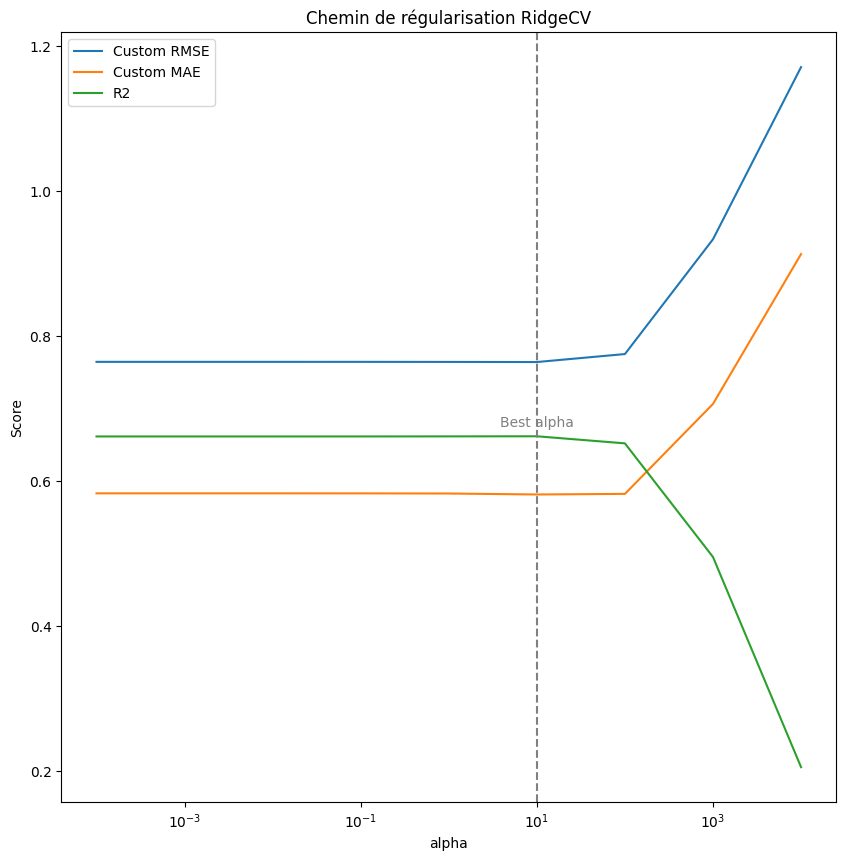

In [55]:
# Tracer les chemins de régularisation pour chaque score en fonction de alpha
plt.figure(figsize=(10, 10))
for score, label in zip([custom_rmse_scores, custom_mae_scores, r2_scores], ['Custom RMSE', 'Custom MAE', 'R2']):
    plt.plot(param_grid['ridge_cv__alphas'], score, label=label)

# Marquer le meilleur alpha sur le graphique
plt.axvline(x=best_params['ridge_cv__alphas'], linestyle='--', color='grey')
plt.text(best_params['ridge_cv__alphas'], max(custom_rmse_scores) - 0.5, s='Best alpha', ha='center', va='bottom', color='grey')

# Ajouter des titres et des légendes
plt.title('Chemin de régularisation RidgeCV')
plt.xlabel('alpha')
plt.ylabel('Score')
plt.xscale('log')
plt.legend()
plt.show()


> **Créons le graphique du coefficient de linéarité en fonction des valeurs de ridge_cv__alphas**

In [56]:
# Récupérons le nom des caractéristiques
feature_names = X_train.columns.tolist()

In [57]:
# Obtenir les coefficients de linéarité pour chaque valeur de alpha
coefs = []
for alpha in np.logspace(-5, 6, 50):
    pipe.set_params(ridge_cv__alphas=alpha)
    pipe.fit(X_train, y_train)
    coefs.append(pipe.named_steps['ridge_cv'].coef_)

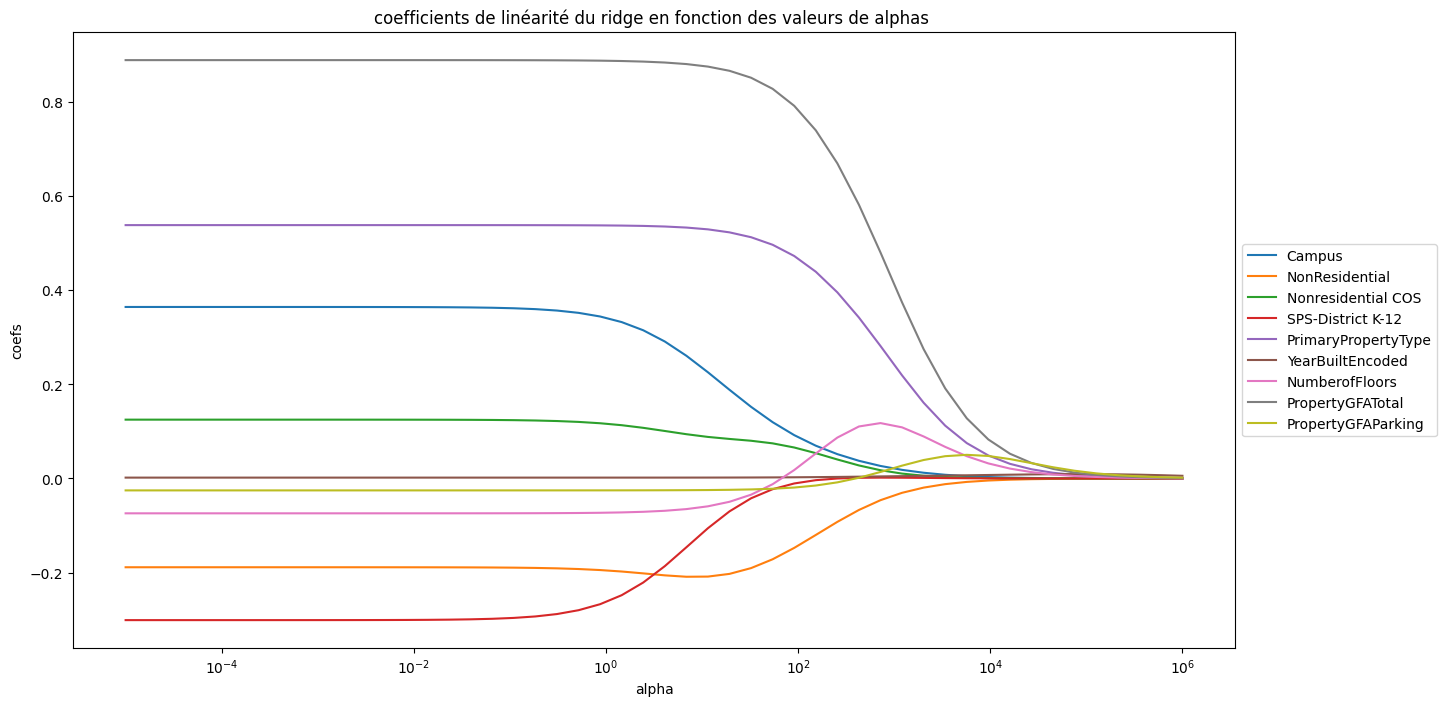

In [58]:
# Tracer le graphique des coefficients en fonction de alpha
plt.figure(figsize=(15, 8))

ax = plt.gca()
ax.plot(np.logspace(-5, 6, 50), coefs)
ax.set_xscale('log')
plt.title('coefficients de linéarité du ridge en fonction des valeurs de alphas ')
plt.xlabel('alpha')
plt.ylabel('coefs')

# Ajouter la légende des caractéristiques en dehors du graphique
plt.legend(labels=feature_names, loc='center left', bbox_to_anchor=(1, 0.5))

plt.axis('tight')
plt.show()

>> ### **Application du LASSO**

In [ ]:
X = df_for_prediction.loc[:, ~df_for_prediction.columns.isin(['SiteEnergyUse(kBtu)', 'ENERGYSTARScore','TotalGHGEmissions'])]

In [ ]:
y = df_for_prediction['SiteEnergyUse(kBtu)']

> **Partitionnons les données**

In [ ]:
from sklearn import model_selection

Séparons nos données en un jeu d’entraînement et un jeu de test. Le jeu de test contiendra 30% des données.

In [ ]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, 
                                                                    y, 
                                                                    test_size=0.3
                                                                    )

In [ ]:
!pip install category_encoders

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from sklearn.pipeline import Pipeline
from category_encoders import TargetEncoder
from sklearn.linear_model import LassoCV
from sklearn.model_selection import KFold
from sklearn.metrics import make_scorer, mean_squared_error, mean_absolute_error, r2_score

In [ ]:
# Définition les fonctions de notation personnalisées
def custom_rmse(y_true, y_pred):
    return np.sqrt(mean_squared_error(y_true, y_pred))

def custom_mae(y_true, y_pred):
    return mean_absolute_error(y_true, y_pred)

In [ ]:
# Définir la plage d'alphas à tester
alphas = np.logspace(-4, 4, 9)
alphas

array([1.e-04, 1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03,
       1.e+04])

In [ ]:
# Créons le pipeline avec l'encodage cible et LassoCV
pipe = Pipeline([('target_encoder', TargetEncoder(cols='PrimaryPropertyType')),
                 ('lasso', LassoCV(cv=KFold(n_splits=5, shuffle=True, random_state=42), alphas=alphas))])

In [ ]:
# Ajustons le pipeline avec le meilleur alpha
pipe.fit(X_train, y_train)

Pipeline(steps=[('target_encoder', TargetEncoder(cols=['PrimaryPropertyType'])),
                ('lasso',
                 LassoCV(alphas=array([1.e-04, 1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03,
       1.e+04]),
                         cv=KFold(n_splits=5, random_state=42, shuffle=True)))])

> Faire des prédictions sur les données de test

In [ ]:
y_pred = pipe.predict(X_test)

In [ ]:
# Afficher les meilleurs paramètres et les scores obtenus
print("Best alpha: {}".format(pipe.named_steps['lasso'].alpha_))

rmse = custom_rmse(y_test, y_pred)
mae = custom_mae(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Score RMSE : {:.4f}".format(rmse))
print("Score MAE : {:.4f}".format(mae))
print("R2 : {:.4f}".format(r2))

Best alpha: 0.0001
Score RMSE : 0.7926
Score MAE : 0.6028
R2 : 0.6269


> Appliquons la **transformation exponentielle sur la RMSE du kBTU** sur les prédictions de votre modèle

In [ ]:
# Calculons les prédictions en exp
y_pred_exp = np.exp(y_pred)

In [ ]:
# Calculons la RMSE en log
rmse_log = mean_squared_error(np.exp(y_test), y_pred_exp, squared=False)

# Appliquons la transformation exponentielle
rmse_kbtu = rmse_exp

print("RMSE en kBTU      : ", rmse_kbtu.round(4))

RMSE en kBTU      :  14024482.1217


> **Représentons le chemin de régularisation du LASSO**

In [ ]:
# Obtenir toutes les valeurs de mse_path
lasso_cv = pipe.named_steps['lasso']

In [ ]:
alphas = lasso_cv.alphas_
alphas

array([1.e+04, 1.e+03, 1.e+02, 1.e+01, 1.e+00, 1.e-01, 1.e-02, 1.e-03,
       1.e-04])

In [ ]:
scores_path = lasso_cv.mse_path_
scores_path

array([[1.84025721, 1.88736941, 1.49276831, 1.6872197 , 1.51512765],
       [1.84025721, 1.88736941, 1.49276831, 1.6872197 , 1.51512765],
       [1.84025721, 1.88736941, 1.49276831, 1.6872197 , 1.51512765],
       [1.80908353, 1.8588303 , 1.4602698 , 1.65526978, 1.48669673],
       [1.63581292, 1.6451634 , 1.29938254, 1.51161531, 1.29055437],
       [0.56193951, 0.72691639, 0.45134335, 0.63623751, 0.54920918],
       [0.51947512, 0.70485992, 0.43757133, 0.59052689, 0.52354473],
       [0.51304914, 0.70271696, 0.44423658, 0.57141631, 0.5235439 ],
       [0.51121786, 0.70259807, 0.44513513, 0.56870728, 0.52527047]])

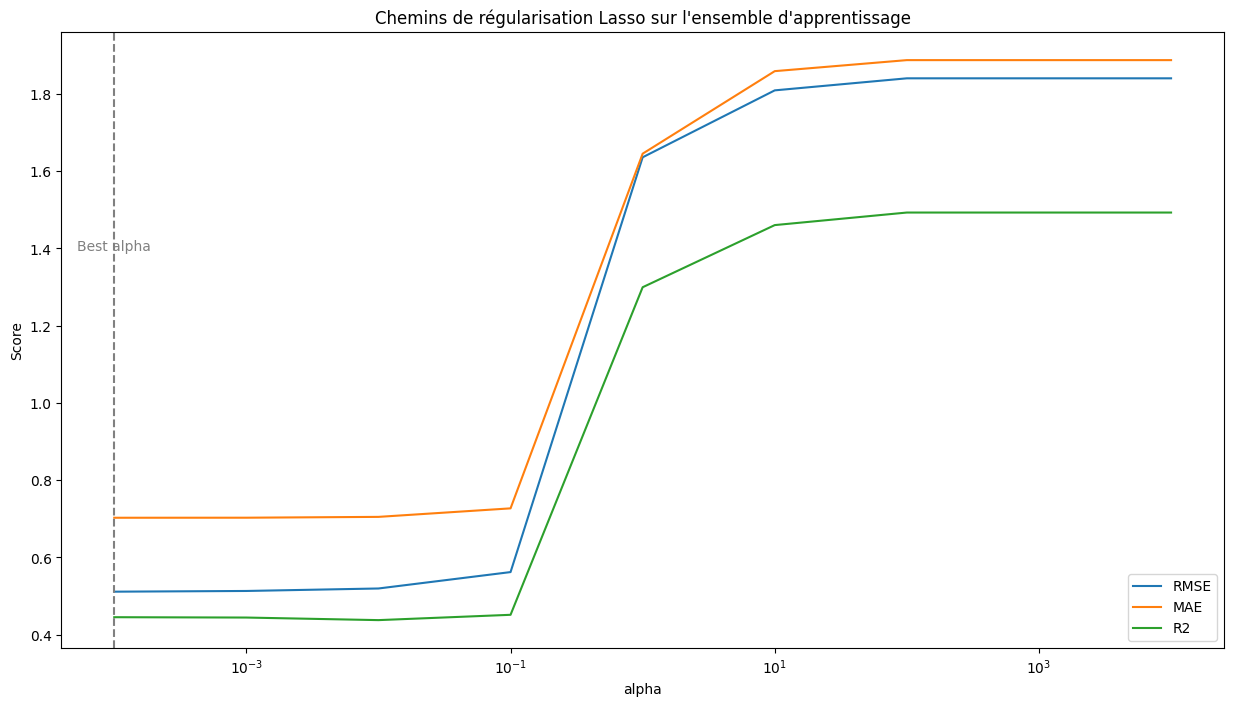

In [ ]:
# Traçons les chemins de régularisation pour chaque score en fonction d'alpha
plt.figure(figsize=(15, 8))
for i, score_label in enumerate(['RMSE', 'MAE', 'R2']):
    plt.plot(alphas, scores_path[:, i], label=score_label)

# Marquons le meilleur alpha sur le graphe
best_alpha = pipe.named_steps['lasso'].alpha_
plt.axvline(x=best_alpha, linestyle='--', color='grey')
plt.text(best_alpha, np.max(scores_path) - 0.5, s='Best alpha', ha='center', va='bottom', color='grey')

plt.title('Chemins de régularisation Lasso sur l\'ensemble d\'apprentissage')
plt.xlabel('alpha')
plt.ylabel('Score')
plt.xscale('log')
plt.legend()
plt.show()


> **Mesurons le temps d'exécution à l'entrainement**

In [ ]:
import time

In [ ]:
# Mesurer le temps d'exécution de la fonction fit()
start_time = time.time()

best_estimator = pipe.named_steps['lasso'].alpha_

best_model = pipe.set_params(lasso__alphas=[best_estimator])
best_model.fit(X_train, y_train)

fit_time = (time.time() - start_time) * 1000  # Transformer le temps en millisecondes
print("Temps d'exécution de la fonction fit(): {:.2f} ms".format(fit_time))

Temps d'exécution de la fonction fit(): 39.04 ms


> **Mesurons le temps d'exécution à la prédiction**



In [ ]:
# Mesurer le temps d'exécution de la fonction predict()
start_time = time.time()

y_pred = best_model.predict(X_test)

predict_time = (time.time() - start_time) * 1000  # Transformer le temps en millisecondes
print("Temps d'exécution de la fonction predict(): {:.2f} ms".format(predict_time))

Temps d'exécution de la fonction predict(): 18.47 ms


> **Créons le graphique du coefficient de linéarité en fonction des valeurs de alphas**

In [ ]:
# Récupérons le nom des caractéristiques
feature_names = X_train.columns.tolist()

In [ ]:
# Obtenir les coefficients de linéarité pour chaque valeur de alpha
coefs = []
for alpha in np.linspace(0.001, 100, 50):
    pipe.named_steps['lasso'].set_params(alphas=[alpha])
    pipe.fit(X_train, y_train)
    coefs.append(pipe.named_steps['lasso'].coef_)


> Affichons le graphique

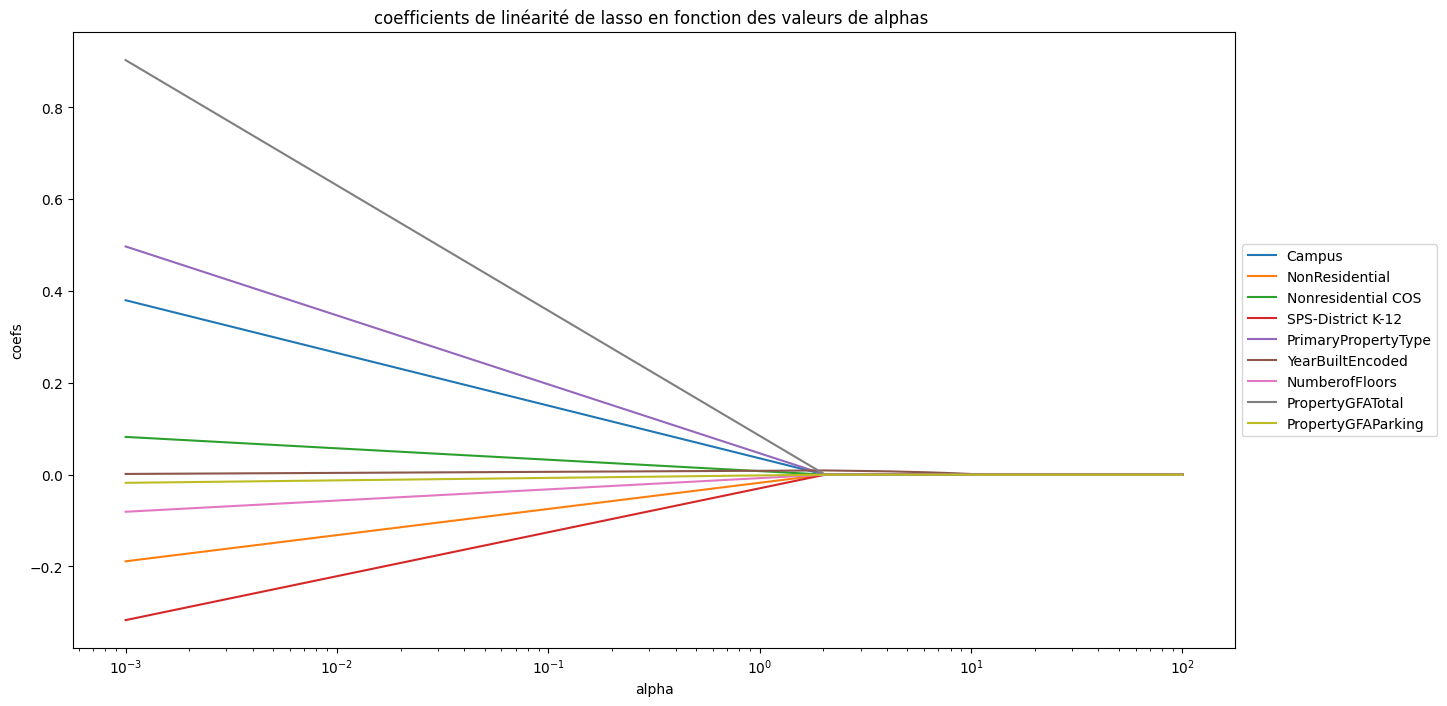

In [ ]:
# Tracer le graphique des coefficients en fonction de alpha
plt.figure(figsize=(15, 8))

ax = plt.gca()
ax.plot(np.linspace(0.001, 100, 50), coefs)
ax.set_xscale('log')
plt.xlabel('alpha')
plt.ylabel('coefs')
plt.title('coefficients de linéarité de lasso en fonction des valeurs de alphas ')
plt.axis('tight')

# Ajouter la légende des caractéristiques en dehors du graphique
plt.legend(labels=feature_names, loc='center left', bbox_to_anchor=(1, 0.5))

plt.show()

> ## **Modèle Elastic Net** 

>> Modèle de régression linéaire régularisée qui combine à la fois la régularisation L1 (Lasso) et L2 (Ridge)

In [ ]:
X = df_for_prediction.loc[:, ~df_for_prediction.columns.isin(['SiteEnergyUse(kBtu)', 'ENERGYSTARScore','TotalGHGEmissions'])]

In [ ]:
y = df_for_prediction['SiteEnergyUse(kBtu)']

> **Partitionnons les données**

In [ ]:
from sklearn import model_selection

Séparons nos données en un jeu d’entraînement et un jeu de test. Le jeu de test contiendra 30% des données.

In [ ]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, 
                                                                    y, 
                                                                    test_size=0.3
                                                                    )

In [ ]:
from sklearn.pipeline import Pipeline
from category_encoders.target_encoder import TargetEncoder
from sklearn.linear_model import ElasticNet
from sklearn.model_selection import KFold
from sklearn.metrics import make_scorer, mean_squared_error, mean_absolute_error, r2_score

In [ ]:
# Création de la pipeline
pipeline = Pipeline([
    ('encoder', TargetEncoder(cols='PrimaryPropertyType')),
    ('model', ElasticNet())
])

In [ ]:
# Définition des valeurs alpha
alphas = np.logspace(-4, 4, 9)

In [ ]:
# Définition de la méthode des folds
kf = KFold(n_splits=5, shuffle=True, random_state=42)

In [ ]:
# Définition d'une liste pour stocker les résultats de chaque itération
best_results = []

# Boucle sur les valeurs alpha
for alpha in alphas:
    # Mise à jour du paramètre alpha de la pipeline
    pipeline.set_params(model__alpha=alpha)
    
    # Boucle sur chaque fold
    for train_index, test_index in kf.split(X_train):
        # Extraction des données d'entraînement et de test
        X_fold_train, X_fold_test = X_train.iloc[train_index], X_train.iloc[test_index]
        y_fold_train, y_fold_test = y_train.iloc[train_index], y_train.iloc[test_index]
        
        # Entraînement et évaluation du modèle sur le fold courant
        pipeline.fit(X_fold_train, y_fold_train)

        y_pred = pipeline.predict(X_fold_test)

        # Calcul des métriques
        rmse = mean_squared_error(y_fold_test, y_pred, squared=False)
        mse = mean_squared_error(y_fold_test, y_pred)
        mae = mean_absolute_error(y_fold_test, y_pred)
        r2 = r2_score(y_fold_test, y_pred)
        
        # Ajout des métriques à la liste de résultats si alpha est le meilleur
        if len(best_results) == 0 or mse < best_results[0]['mse']:
            best_results.append({'alpha': alpha, 'rmse': rmse, 'mse': mse, 'mae': mae, 'r2': r2})


Affichons les meilleures métriques pour le meilleur alpha

In [ ]:
best_alpha = best_results[0]['alpha']
best_rmse = best_results[0]['rmse']
best_mse = best_results[0]['mse']
best_mae = best_results[0]['mae']
best_r2 = best_results[0]['r2']

print('Meilleur Alpha :', best_alpha, '\n'
      'Meilleur RMSE   : {:.4f}'.format(best_rmse), '**', '\n'
      'Meilleur MSE   : {:.4f}'.format(best_mse), '\n'
      'Meilleur MAE   : {:.4f}'.format(best_mae), '\n'
      'Meilleur R2    : {:.4f}'.format(best_r2))


Meilleur Alpha : 0.0001 
Meilleur RMSE   : 0.8034 ** 
Meilleur MSE   : 0.6454 
Meilleur MAE   : 0.6276 
Meilleur R2    : 0.6578


> Mesurons le temps d'exécution à l'entrainement

In [ ]:
import time

In [ ]:
# Mesurer le temps d'exécution de la fonction fit()
start_time = time.time()

best_model = pipeline.set_params(model__alpha=best_alpha)
best_model.fit(X_train, y_train)

fit_time = (time.time() - start_time) * 1000  # Transformer le temps en millisecondes
print("Temps d'exécution de la fonction fit(): {:.2f} ms".format(fit_time))

Temps d'exécution de la fonction fit(): 27.04 ms


In [ ]:
# Prédictions du modèle sur l'ensemble de test
y_pred = pipeline.predict(X_test)

> Mesurons le temps d'exécution à la prédiction

In [ ]:
# Mesurer le temps d'exécution de la fonction predict()
start_time = time.time()

y_pred = best_model.predict(X_test)

predict_time = (time.time() - start_time) * 1000  # Transformer le temps en millisecondes
print("Temps d'exécution de la fonction predict(): {:.2f} ms".format(predict_time))

Temps d'exécution de la fonction predict(): 6.13 ms


> Appliquons la **transformation exponentielle sur la RMSE du kBTU** sur les prédictions de votre modèle

In [ ]:
# Calculons les prédictions en exp
y_pred_exp = np.exp(y_pred)

In [ ]:
# Calculons la RMSE en log
rmse_exp = mean_squared_error(np.exp(y_test), y_pred_exp, squared=False)

# Appliquer la transformation exponentielle
rmse_kbtu = rmse_exp

print("RMSE en kBTU      : ", rmse_kbtu.round(4))

RMSE en kBTU      :  9547474.8756


# <a name="A4"> **Methodes de regression non-linéaire**</a>



>## Utilisation de la méthode du **Random Forest Regressor**

In [ ]:
X = df_for_prediction.loc[:, ~df_for_prediction.columns.isin(['SiteEnergyUse(kBtu)', 'ENERGYSTARScore','TotalGHGEmissions'])]

In [ ]:
y = df_for_prediction['SiteEnergyUse(kBtu)']

> **Partitionnons les données**

In [ ]:
from sklearn import model_selection

Séparons nos données en un jeu d’entraînement et un jeu de test. Le jeu de test contiendra 30% des données.

In [ ]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, 
                                                                    y, 
                                                                    test_size=0.3
                                                                    )

In [ ]:
from sklearn.compose import TransformedTargetRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import Pipeline
from category_encoders import TargetEncoder
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [ ]:
# Création du pipeline
pipe = Pipeline([
    ('encoder', TargetEncoder(cols='PrimaryPropertyType')),
    ('model', RandomForestRegressor())
])

In [ ]:
# Définition de la grille de recherche
param_distributions = {
    'model__n_estimators': [50, 100, 150],
    'model__max_depth': [5, 10, 15, 20],
    'model__min_samples_split': [2, 5, 10],
    'model__min_samples_leaf': [1, 2, 4],
}

In [ ]:
# Création de l'objet de recherche aléatoire
search = RandomizedSearchCV(pipe, param_distributions, n_iter=10, cv=5, 
                            scoring={'mse': 'neg_mean_squared_error', 
                                     'mae': 'neg_mean_absolute_error',
                                     'rmse': 'neg_root_mean_squared_error'}, 
                            refit='rmse', random_state=42)

In [ ]:
# Entraînement du modèle
search.fit(X_train, y_train)

RandomizedSearchCV(cv=5,
                   estimator=Pipeline(steps=[('encoder',
                                              TargetEncoder(cols='PrimaryPropertyType')),
                                             ('model',
                                              RandomForestRegressor())]),
                   param_distributions={'model__max_depth': [5, 10, 15, 20],
                                        'model__min_samples_leaf': [1, 2, 4],
                                        'model__min_samples_split': [2, 5, 10],
                                        'model__n_estimators': [50, 100, 150]},
                   random_state=42, refit='rmse',
                   scoring={'mae': 'neg_mean_absolute_error',
                            'mse': 'neg_mean_squared_error',
                            'rmse': 'neg_root_mean_squared_error'})

> Mesurons le temps d'exécution à l'entrainement

In [ ]:
import time

In [ ]:
# Mesurer le temps d'exécution de la fonction fit()
start_time = time.time()

best_model = search.best_estimator_
best_model.fit(X_train, y_train)

fit_time = (time.time() - start_time) * 1000  # Transformer le temps en millisecondes
print("Temps d'exécution de la fonction fit(): {:.2f} ms".format(fit_time))

Temps d'exécution de la fonction fit(): 277.19 ms


In [ ]:
# Prédiction sur les données de test
y_pred = search.predict(X_test)

> Mesurons le temps d'exécution à la prédiction

In [ ]:
# Mesurer le temps d'exécution de la fonction predict()
start_time = time.time()

y_pred = best_model.predict(X_test)

predict_time = (time.time() - start_time) * 1000  # Transformer le temps en millisecondes
print("Temps d'exécution de la fonction predict(): {:.2f} ms".format(predict_time))

Temps d'exécution de la fonction predict(): 28.40 ms


In [ ]:
# Calcul des scores
rmse = mean_squared_error(y_test, y_pred, squared=False)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

print(f'RMSE:{rmse:.4f} **')
print(f'MAE:{mae:.4f}')
print(f'MSE:{mse:.4f}')

RMSE:0.6628 **
MAE:0.5049
MSE:0.4393


> Appliquons la **transformation exponentielle sur la RMSE du kBTU** sur les prédictions de votre modèle

In [ ]:
# Calculons les prédictions en exp
y_pred_exp = np.exp(y_pred)

In [ ]:
# Calculons la RMSE en exp
rmse_exp = mean_squared_error(np.exp(y_test), y_pred_exp, squared=False)

# Appliquer la transformation exponentielle
rmse_kbtu = rmse_exp

print("RMSE en kBTU      : ", rmse_kbtu.round(4))

RMSE en kBTU      :  20932030.3294


> Utilisation de **SHAP** pour **visualiser l'importance des variables**

In [ ]:
!pip install shap

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 572.4/572.4 KB 10.3 MB/s eta 0:00:00


In [ ]:
import shap

In [ ]:
# Récupération du meilleur modèle et de l'encodeur
best_model = search.best_estimator_['model']
encoder = search.best_estimator_['encoder']

In [ ]:
# Encodage des données d'entraînement
X_train_encoded = encoder.transform(X_train)

In [ ]:
# Calcul des valeurs SHAP pour les données d'entraînement
explainer = shap.Explainer(best_model, X_train_encoded)
shap_values = explainer.shap_values(X_train_encoded)

Le summary plot

No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


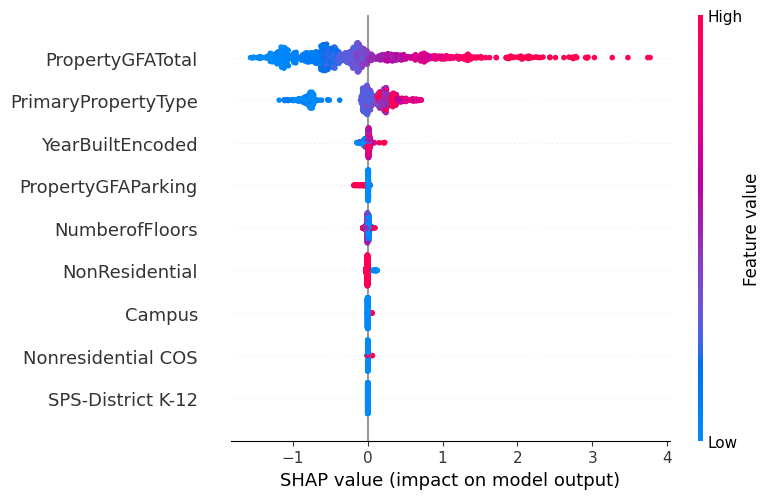

In [ ]:
shap.summary_plot(shap_values, X_train_encoded)

**OU**

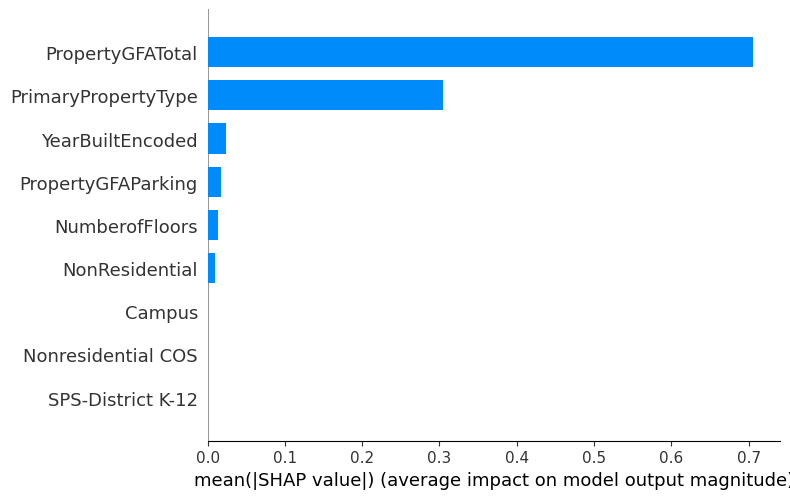

In [ ]:
shap.summary_plot(shap_values, X_train_encoded, plot_type="bar")

>## Utilisation de la méthode du **XGB Regressor**

In [ ]:
X = df_for_prediction.loc[:, ~df_for_prediction.columns.isin(['SiteEnergyUse(kBtu)', 'ENERGYSTARScore','TotalGHGEmissions'])]

In [ ]:
y = df_for_prediction['SiteEnergyUse(kBtu)']

> **Partitionnons les données**

In [ ]:
from sklearn import model_selection

Séparons nos données en un jeu d’entraînement et un jeu de test. Le jeu de test contiendra 30% des données.

In [ ]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, 
                                                                    y, 
                                                                    test_size=0.3
                                                                    )

In [ ]:
from sklearn.pipeline import Pipeline
from category_encoders.target_encoder import TargetEncoder
from xgboost import XGBRegressor
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_squared_log_error

In [ ]:
# Création du pipeline
pipeline = Pipeline([
                      ('encoder', TargetEncoder(cols=['PrimaryPropertyType'])),
                      ('regressor', XGBRegressor())
                      ])

In [ ]:
# Création des hyperparamètres à optimiser
hyperparameters = {
    'regressor__n_estimators': [100, 500, 1000],
    'regressor__max_depth': [3, 5, 7],
    'regressor__learning_rate': [0.01, 0.1, 0.5],
    'regressor__subsample': [0.5, 0.7, 1.0],
    'regressor__colsample_bytree': [0.5, 0.7, 1.0]
}

In [ ]:
# Création de l'objet RandomizedSearchCV
random_search = RandomizedSearchCV(pipeline, hyperparameters, n_iter=10,
                                   scoring={'mse': 'neg_mean_squared_error', 
                                            'mae': 'neg_mean_absolute_error',
                                            'rmse': 'neg_root_mean_squared_error'},
                                   refit='mse', cv=5, n_jobs=-1, verbose=1)

In [ ]:
# Entraînement du modèle
random_search.fit(X_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


RandomizedSearchCV(cv=5,
                   estimator=Pipeline(steps=[('encoder',
                                              TargetEncoder(cols=['PrimaryPropertyType'])),
                                             ('regressor',
                                              XGBRegressor(base_score=None,
                                                           booster=None,
                                                           callbacks=None,
                                                           colsample_bylevel=None,
                                                           colsample_bynode=None,
                                                           colsample_bytree=None,
                                                           early_stopping_rounds=None,
                                                           enable_categorical=False,
                                                           eval_metric=None,
                                                           feature_types=None,
                                                           gamma=None,
                                                           gpu_id=N...
                   n_jobs=-1,
                   param_distributions={'regressor__colsample_bytree': [0.5,
                                                                        0.7,
                                                                        1.0],
                                        'regressor__learning_rate': [0.01, 0.1,
                                                                     0.5],
                                        'regressor__max_depth': [3, 5, 7],
                                        'regressor__n_estimators': [100, 500,
                                                                    1000],
                                        'regressor__subsample': [0.5, 0.7,
                                                                 1.0]},
                   refit='mse',
                   scoring={'mae': 'neg_mean_absolute_error',
                            'mse': 'neg_mean_squared_error',
                            'rmse': 'neg_root_mean_squared_error'},
                   verbose=1)

> Mesurons le temps d'exécution à l'entrainement

In [ ]:
import time

In [ ]:
# Mesurer le temps d'exécution de la fonction fit()
start_time = time.time()

best_model = random_search.best_estimator_ 
best_model.fit(X_train, y_train)

fit_time = (time.time() - start_time) * 1000  # Transformer le temps en millisecondes
print("Temps d'exécution de la fonction fit(): {:.2f} ms".format(fit_time))

Temps d'exécution de la fonction fit(): 946.26 ms


In [ ]:
# Prédiction sur les données de test
y_pred = random_search.predict(X_test)

> Mesurons le temps d'exécution à la prédiction

In [ ]:
# Mesurer le temps d'exécution de la fonction predict()
start_time = time.time()

y_pred = best_model.predict(X_test)

predict_time = (time.time() - start_time) * 1000  # Transformer le temps en millisecondes
print("Temps d'exécution de la fonction predict(): {:.2f} ms".format(predict_time))

Temps d'exécution de la fonction predict(): 16.58 ms


In [ ]:
# Calculer les paramètres de notation
rmse = mean_squared_error(y_test, y_pred, squared=False)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

print(f'RMSE:{rmse:.4f}')
print(f'MAE:{mae:.4f}')
print(f'MSE:{mse:.4f}')

RMSE:0.6218
MAE:0.4885
MSE:0.3866


> Appliquons la **transformation exponentielle sur la RMSE du kBTU** sur les prédictions de votre modèle

In [ ]:
# Calculons les prédictions en exp
y_pred_exp = np.exp(y_pred)

In [ ]:
# Calculons la RMSE en log
rmse_exp = mean_squared_error(np.exp(y_test), y_pred_exp, squared=False)

# Appliquons la transformation exponentielle
rmse_kbtu = rmse_exp

# Afficher les métriques
print("RMSE en kBTU      : ", rmse_kbtu.round(4))

RMSE en kBTU      :  16065290.3613


> Utilisation de **SHAP** pour **visualiser l'importance des variables**

In [ ]:
!pip install shap

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import shap

In [ ]:
# Récupération du meilleur modèle et de l'encodeur
best_model = random_search.best_estimator_['regressor']
encoder = random_search.best_estimator_['encoder']

In [ ]:
# Encodage des données d'entraînement
X_train_encoded = encoder.transform(X_train)

In [ ]:
# Calcul des valeurs SHAP pour les données d'entraînement
explainer = shap.Explainer(best_model, X_train_encoded)
shap_values = explainer.shap_values(X_train_encoded)

 97%|=================== | 1046/1077 [00:25<00:00]       

Le summary plot

No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


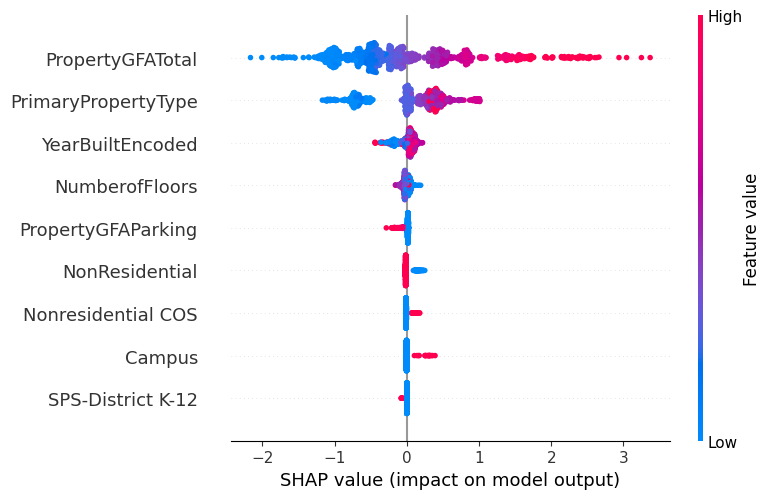

In [ ]:
shap.summary_plot(shap_values, X_train_encoded)

**OU**

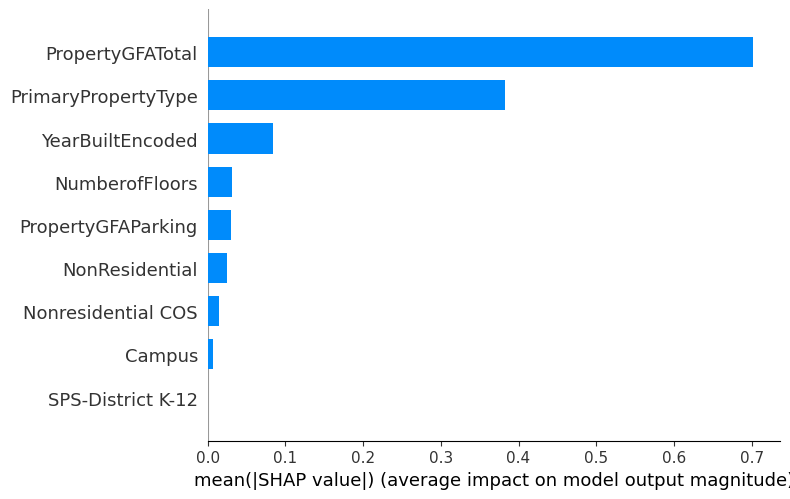

In [ ]:
shap.summary_plot(shap_values, X_train_encoded, plot_type="bar")

In [ ]:
#f.savefig("/summary_plot1.png", bbox_inches='tight', dpi=600)

# <a name="A5"> **CHOIX DE LA MEILLEURE METHODE DE PREDICTION**</a>

>>> 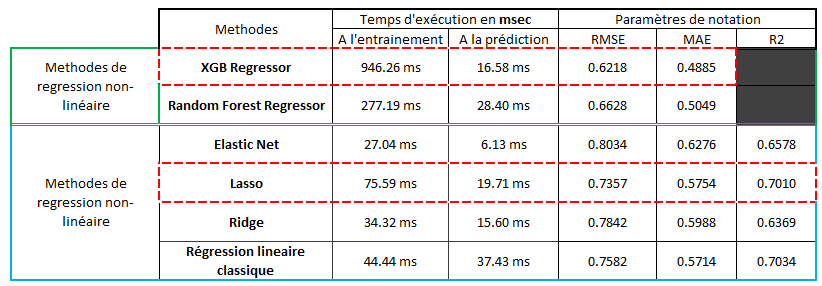

> **Analyse comparative entre les méthodes de prediction linéaire**

Constat :

- **En termes de temps d'exécution**, la méthode **Elastic Net est la plus rapide pour l'entraînement et la prédiction**, suivie de Ridge, Lasso et enfin Régression linéaire classique.



---



- **En termes de performance**, la méthode **Lasso a le meilleur score de RMSE et MAE et la meilleure valeur de R2**, ce qui suggère qu'**elle offre la meilleure prédiction globale**.



---



Ainsi, **en prenant en compte les temps d'exécution et les performances**, il serait préférable d'utiliser la méthode Lasso pour la prédiction.

> **Analyse comparative entre les méthodes de prediction non-linéaire**

Constat :

**En ce qui concerne le temps d'exécution**, le **XGB Regressor est nettement plus rapide que le Random Forest Regressor**, tant à l'entraînement qu'à la prédiction.



---



**En ce qui concerne les performances de prédiction**, le **XGB Regressor présente des erreurs de prédiction inférieures à celles du Random Forest Regressor**. Cela est démontré par les mesures RMSE et MAE inférieures pour le XGB Regressor.



---



Dans l'ensemble, si la vitesse d'exécution est un facteur important, alors **le XGB Regressor est la meilleure option**. Mais si la précision de prédiction est plus importante, alors le XGB Regressor est également le meilleur choix en raison de ses erreurs de prédiction inférieures. 

>> **CHOIX DE LA MEILLEUR METHODE DE PREDICTION**

**La méthode Lasso** est plus simple que la méthode XGB Regressor car elle **utilise une technique de régularisation qui permet de sélectionner les variables les plus importantes dans le modèle**. 

En revanche, **la méthode XGB Regressor utilise un algorithme de Boosting qui est plus complexe.**

Donc dans l'ensemble, vu que le critère qui nous interesse ici, c'est la précision de la prédiction, alors **la méthode XGB Regressor est la meilleure option**

>> **Recursive Feature Elimination (RFE) avec le meilleur modèle de Ridge**

In [59]:
from sklearn.feature_selection import RFE

In [60]:
# Extraire le meilleur modèle de la grille de recherche
best_model = grid_search.best_estimator_['ridge_cv']
best_model

RidgeCV(alphas=10.0)

In [61]:
# Sélectionner les colonnes à utiliser pour l'entraînement du modèle RFE
rfe_cols = X.columns.tolist()
rfe_cols

['Campus',
 'NonResidential',
 'Nonresidential COS',
 'SPS-District K-12',
 'PrimaryPropertyType',
 'YearBuiltEncoded',
 'NumberofFloors',
 'PropertyGFATotal',
 'PropertyGFAParking']

**Déterminons le nombre optimal de fonctionnalités pour notre modèle**

In [62]:
# Définir une plage de nombre de fonctionnalités à tester
n_features_range = range(1, 11)

# Créer des listes pour stocker les scores RMSE et R² pour chaque nombre de fonctionnalités
rmse_scores = []
r2_scores = []

# Boucler sur chaque nombre de fonctionnalités et tester le modèle correspondant
for n in n_features_range:
    # Créer un sélecteur de fonctionnalités récursives (RFE) 
    encoder = grid_search.best_estimator_['target_encoder']
    X_train_encoded = encoder.transform(X_train)

    rfe = RFE(estimator=best_model, n_features_to_select=n, step=1)
    
    # Appliquer le sélecteur de fonctionnalités RFE sur les données d'entraînement
    rfe.fit(X_train_encoded, y_train)
    X_train_rfe = rfe.transform(X_train_encoded)

    X_test_encoded = encoder.transform(X_test)
    X_test_rfe = rfe.transform(X_test_encoded)
    
    # Entraîner un modèle RidgeCV sur les données d'entraînement sélectionnées par RFE
    ridge_model_rfe = RidgeCV(alphas=np.logspace(-4, 4, 9))
    ridge_model_rfe.fit(X_train_rfe, y_train)
    
    # Faire des prédictions sur les données de test sélectionnées par RFE
    y_pred_ridge_rfe = ridge_model_rfe.predict(X_test_rfe)
    
    # Calculer les scores RMSE et R² pour ce nombre de fonctionnalités
    rmse_scores.append(mean_squared_error(y_test, y_pred_ridge_rfe, squared=False))
    r2_scores.append(r2_score(y_test, y_pred_ridge_rfe))

# Trouver l'indice de l'élément dans la liste r2_scores qui a la valeur maximale
max_r2_idx = np.argmax(r2_scores)

# Trouver le nombre de fonctionnalités correspondant à l'indice maximal
optimal_n_features = n_features_range[max_r2_idx]

In [63]:
# Trouver l'indice de l'élément dans la liste r2_scores qui a la valeur maximale
max_idx = np.argmax(r2_scores)

# Trouver le nombre de features correspondant à l'indice maximal
best_num_features = n_features_range[max_idx]

# Calculer la pente de la courbe RMSE et R2
slope_rmse = np.gradient(rmse_scores)
slope_R2 = np.gradient(rmse_scores)

# Trouver la position (index) où la pente est proche de zéro
plateau_idx_rmse = np.argmin(np.abs(slope_rmse))
plateau_idx_R2 = np.argmin(np.abs(slope_R2))

# Trouver les valeurs X et Y correspondant au plateau de la courbe RMSE
plateau_num_features_rmse = n_features_range[plateau_idx_rmse]
plateau_rmse_score = rmse_scores[plateau_idx_rmse]

# Trouver les valeurs X et Y correspondant au plateau de la courbe R2
plateau_num_features_R2 = n_features_range[plateau_idx_R2]
plateau_r2_scores = r2_scores[plateau_idx_R2]


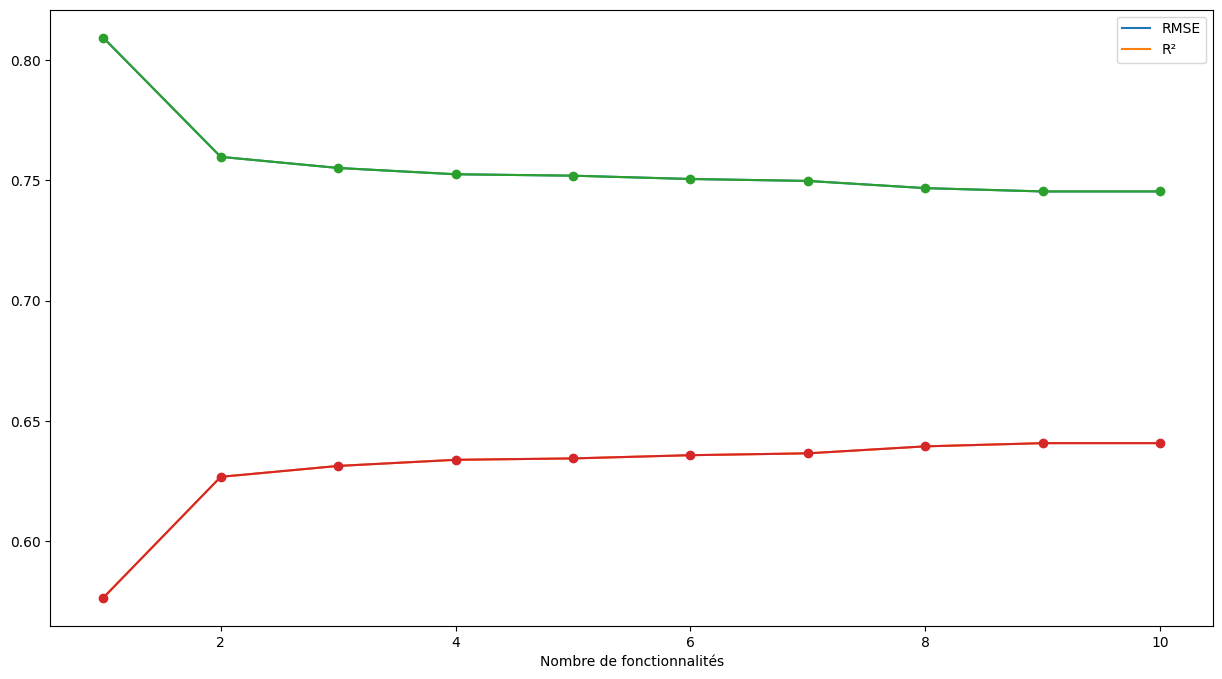

In [64]:
plt.figure(figsize=(15, 8))

# Tracer les courbes RMSE et R² en fonction du nombre de fonctionnalités
plt.plot(n_features_range, rmse_scores, label='RMSE')
plt.plot(n_features_range, r2_scores, label='R²')

plt.plot(n_features_range, rmse_scores, '-o')
plt.plot(n_features_range, r2_scores, '-o')


plt.xlabel('Nombre de fonctionnalités')
plt.legend()
plt.show()

In [65]:
# Sélectionner les fonctionnalités correspondant au nombre optimal de fonctionnalités de 10
rfe = RFE(estimator=best_model, n_features_to_select=4, step=1)

encoder = grid_search.best_estimator_['target_encoder']
X_train_encoded = encoder.transform(X_train)

rfe.fit(X_train_encoded, y_train)

X_train_rfe = rfe.transform(X_train_encoded)

X_test_encoded = encoder.transform(X_test)

X_test_rfe = rfe.transform(X_test_encoded)

In [66]:
X_train_encoded.columns[rfe.support_]

Index(['Campus', 'NonResidential', 'PrimaryPropertyType', 'PropertyGFATotal'], dtype='object')

In [67]:
X_train_encoded.columns

Index(['Campus', 'NonResidential', 'Nonresidential COS', 'SPS-District K-12',
       'PrimaryPropertyType', 'YearBuiltEncoded', 'NumberofFloors',
       'PropertyGFATotal', 'PropertyGFAParking'],
      dtype='object')

In [68]:
rfe.support_

array([ True,  True, False, False,  True, False, False,  True, False])

In [69]:
# Entraîner le modèle sur les données sélectionnées par RFE
ridge_model_rfe = RidgeCV(alphas=np.logspace(-4, 4, 9))
ridge_model_rfe.fit(X_train_rfe, y_train)

RidgeCV(alphas=array([1.e-04, 1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03,
       1.e+04]))

In [70]:
# Faire des prédictions sur les données de test
y_pred_ridge_rfe = ridge_model_rfe.predict(X_test_rfe)

In [71]:
# Évaluer les performances du modèle avec RMSE, MSE et R2
rmse_ridge_rfe = mean_squared_error(y_test, y_pred_ridge_rfe, squared=False)
mse_ridge_rfe = mean_squared_error(y_test, y_pred_ridge_rfe, squared=True)
r2_score_ridge_rfe = r2_score(y_test, y_pred_ridge_rfe)

In [72]:
# Afficher les scores RMSE, MSE et R2
print("RMSE     :", rmse_ridge_rfe.round(3))
print("MSE      :", mse_ridge_rfe.round(3))
print("R2 score :", r2_score_ridge_rfe.round(3))

RMSE     : 0.753
MSE      : 0.566
R2 score : 0.634
